# Sentiment Analysis


In [1]:
from textblob import TextBlob
from nrclex import NRCLex
from afinn import Afinn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [ ]:
data = pd.read_csv('../data/train.csv')
data.head()

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,1,startup_1,NaN,"Dec 11, 2018",Current Employee,Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4.0,5.0,5.0,4.0,5.0,0,5
1,2,startup_1,"Mountain View, CA","Jun 21, 2013",Former Employee,Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2.0,3.0,3.0,5.0,3.0,2094,5
2,3,startup_1,"New York, NY","May 10, 2014",Current Employee,Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,4.0,5.0,5.0,4.0,949,5
3,4,startup_1,"Mountain View, CA","Feb 8, 2015",Current Employee,Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2.0,5.0,5.0,4.0,5.0,498,4
4,10,startup_1,NaN,"Dec 9, 2018",Current Employee,Anonymous Employee,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5.0,5.0,5.0,5.0,5.0,0,4


In [3]:
text = data['positives'].iloc[9919]
psentences = data['positives'].iloc[2401:2408]
nsentences = data['negatives'].iloc[2401: 2408]
text , psentences  ,nsentences

('The money was great and the talent of my peers far exceeded any group I have worked with.',
 2401                  good working environment ,culture .
 2402    Amazing People Good Benefits Amazing opportuni...
 2403                        Awesome working place to work
 2404    Google truly stands out when it comes to benef...
 2405    Best in the market Good experience Learnt a lo...
 2406    Usually engineers can pursue doing the technic...
 2407                       ı worked at school environment
 Name: positives, dtype: object,
 2401                            nothing to say for cons .
 2402    Recruitment is horrible, they forget you, and ...
 2403       sleepless nights. countless meetings to attend
 2404    i am an normal student studying in panimalar e...
 2405    Pressurised a little Too far in gurgaon Can be...
 2406    A little bit shift from bottom-up to top-down ...
 2407                             ı did not receive salary
 Name: negatives, dtype: object)

## TextBlob


In [4]:
blob = TextBlob(text)
blob.sentiment.polarity , blob.sentiment.subjectivity

(0.45, 0.875)

In [5]:
for sentence in nsentences:
    print(f"review: {sentence}")
    print(f"Polarity: {TextBlob(sentence).sentiment.polarity}")
    print(f"."*50)

review: nothing to say for cons .
Polarity: 0.0
..................................................
review: Recruitment is horrible, they forget you, and only care about their own job. People are too educated for their positions. It's very structured compared to what they wish to be. Innovation happens by acquiring start-ups. Internal transfers to other countries can be a lot more difficult than they say.
Polarity: -0.040625
..................................................
review: sleepless nights. countless meetings to attend
Polarity: 0.0
..................................................
review: i am an normal student studying in panimalar engineering college (chennai)1 year (ece group)
Polarity: 0.15
..................................................
review: Pressurised a little Too far in gurgaon Can be hectic for some as its a target based work and can build pressure
Polarity: -0.04375
..................................................
review: A little bit shift from bottom-up t

## NCRLEX


In [6]:
from nrclex import NRCLex

emotion = NRCLex(text)
emotion.raw_emotion_scores , emotion.top_emotions , emotion.affect_frequencies

({'anger': 1,
  'anticipation': 1,
  'joy': 1,
  'positive': 2,
  'surprise': 1,
  'trust': 1},
 [('positive', 0.2857142857142857)],
 {'fear': 0.0,
  'anger': 0.14285714285714285,
  'anticip': 0.0,
  'trust': 0.14285714285714285,
  'surprise': 0.14285714285714285,
  'positive': 0.2857142857142857,
  'negative': 0.0,
  'sadness': 0.0,
  'disgust': 0.0,
  'joy': 0.14285714285714285,
  'anticipation': 0.14285714285714285})

text: The movie made me happy, anxious and full of anticipation.
Emotion        anticipation  fear  joy  negative  positive  trust
Word                                                             
anticipation.           1.0   0.0  0.0       0.0       0.0    0.0
anxious                 1.0   1.0  0.0       1.0       0.0    0.0
full                    0.0   0.0  0.0       0.0       1.0    0.0
happy,                  1.0   0.0  1.0       0.0       1.0    1.0


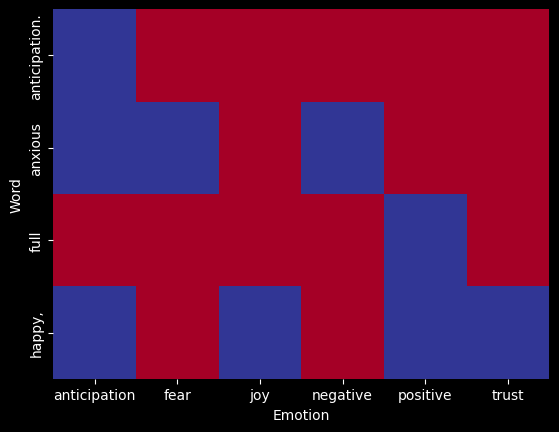

In [7]:
emodata = []
text = "The movie made me happy, anxious and full of anticipation."
print(f"text: {text}")
words = text.lower().split()
for word in words:
    wemotion = NRCLex(word)
    for emo in wemotion.raw_emotion_scores.keys():
        emodata.append({"Word":word , "Emotion":emo , "Flag" : 1})

df = pd.DataFrame(emodata)
ptable = pd.pivot_table(df , values = 'Flag' , columns = 'Emotion' , index = 'Word' , fill_value=0)
print(f"{ptable}")
sns.heatmap(ptable , cmap = 'RdYlBu' , cbar = False)
plt.show()


## Afinn


In [23]:
from afinn import Afinn

af = Afinn()

sentences = [
    "The service was amazing and the staff was wonderful!",
    "The food was horrible and I hated the experience.",
    "The hotel is okay, nothing special.",
    "Absolutely love this place!",
    "The customer support is terrible!"
]

for sentence in sentences:
    print(f"{sentence} --> {af.score(sentence)}")
    print(f"{af.score_with_pattern(sentence) = }")
    print(f"{af.score_with_wordlist(sentence) = }")
    #find matched words and print each word's score:
    words = af.split(sentence)
    print(f"{words = }")
    matched_words = [word for word in words if af.score(word) != 0]
    word_scores = {word : af.score(word) for word in matched_words}
    print(f"{matched_words = }")
    print(f"{word_scores = }")
    print(f"total: {af.score(sentence)}")
    print("*"*100)

The service was amazing and the staff was wonderful! --> 8.0
af.score_with_pattern(sentence) = 8.0
af.score_with_wordlist(sentence) = 8.0
words = ['The', 'service', 'was', 'amazing', 'and', 'the', 'staff', 'was', 'wonderful']
matched_words = ['amazing', 'wonderful']
word_scores = {'amazing': 4.0, 'wonderful': 4.0}
total: 8.0
****************************************************************************************************
The food was horrible and I hated the experience. --> -6.0
af.score_with_pattern(sentence) = -6.0
af.score_with_wordlist(sentence) = -6.0
words = ['The', 'food', 'was', 'horrible', 'and', 'I', 'hated', 'the', 'experience']
matched_words = ['horrible', 'hated']
word_scores = {'horrible': -3.0, 'hated': -3.0}
total: -6.0
****************************************************************************************************
The hotel is okay, nothing special. --> 0.0
af.score_with_pattern(sentence) = 0.0
af.score_with_wordlist(sentence) = 0.0
words = ['The', 'hotel', 'is'

### Excercise:


In [96]:
from textblob import TextBlob

text = "The experience was a mix of amazing moments and extremely frustrating delays."
blob = TextBlob(text)
print(blob.sentiment.polarity)

0.10000000000000003


In [100]:
text = "I am excited but also afraid and doubtful."
emotion = NRCLex(text)
emotion.raw_emotion_scores , emotion.affect_frequencies 

({'anticipation': 1,
  'joy': 1,
  'positive': 1,
  'surprise': 1,
  'trust': 1,
  'fear': 1,
  'negative': 2},
 {'fear': 0.125,
  'anger': 0.0,
  'anticip': 0.0,
  'trust': 0.125,
  'surprise': 0.125,
  'positive': 0.125,
  'negative': 0.25,
  'sadness': 0.0,
  'disgust': 0.0,
  'joy': 0.125,
  'anticipation': 0.125})

In [102]:
from nrclex import NRCLex
emotion = NRCLex("I admire your courage and feel strong trust.")
print(emotion.top_emotions)

[('trust', 0.5), ('positive', 0.5)]


# Recommendation Systems rough:


In [37]:
df = pd.read_csv("./data/restaurant.csv")
df.head()

,Restaurant,City,Cuisine
0,Kochi Kitchen,Kerala,"North Indian, Mughlai, Chinese"
1,Hotel Chandra,Hyderabad,"Cafe, Mexican, Italian"
2,Cafe Coffee Day Surat,Surat,"North Indian, Rajasthani"
3,Hotel KRC Palace,Tezpur,North Indian
4,Galaxy Surat,Surat,"North Indian, South Indian, Andhra, Chinese"


In [48]:
df['City'] = df['City'].apply(str.lower)
df.head()

,Restaurant,City,Cuisine
0,Kochi Kitchen,kerala,"North Indian, Mughlai, Chinese"
1,Hotel Chandra,hyderabad,"Cafe, Mexican, Italian"
2,Cafe Coffee Day Surat,surat,"North Indian, Rajasthani"
3,Hotel KRC Palace,tezpur,North Indian
4,Galaxy Surat,surat,"North Indian, South Indian, Andhra, Chinese"


In [49]:
df.columns = ['restaurant','city','cuisine']

In [50]:
lat_lon = pd.read_csv('./data/india_cities_latLong.csv')
lat_lon['city'] = lat_lon['city'].apply(str.lower)
lat_lon.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,delhi,28.6600,77.2300,India,IN,Delhi,admin,29617000.0,16753235.0
1,mumbai,18.9667,72.8333,India,IN,Mahārāshtra,admin,23355000.0,12478447.0
2,kolkāta,22.5411,88.3378,India,IN,West Bengal,admin,17560000.0,4496694.0
3,bangalore,12.9699,77.5980,India,IN,Karnātaka,admin,13707000.0,8443675.0
4,chennai,13.0825,80.2750,India,IN,Tamil Nādu,admin,11324000.0,6727000.0


In [51]:
lat_lon = lat_lon[['city',	'lat','lng']]

In [52]:
import unicodedata
#normalzing kagaznāgār - to. - kagaznagar
def norm(word):
  return unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8')


In [53]:
lat_lon['city'] = lat_lon['city'].apply(norm)

In [54]:
df = pd.merge(df,lat_lon,on='city',how='left')
df.dropna(inplace=True)
df.head()

,restaurant,city,cuisine,lat,lng
1,Hotel Chandra,hyderabad,"Cafe, Mexican, Italian",17.3667,78.4667
2,Cafe Coffee Day Surat,surat,"North Indian, Rajasthani",21.1700,72.8300
4,Galaxy Surat,surat,"North Indian, South Indian, Andhra, Chinese",21.1700,72.8300
5,The Coral Tree,agra,"Pizza, Cafe, Italian",27.1800,78.0200
6,Radisson Blu Hotel,indore,"Cafe, Italian, Continental",22.7206,75.8472


In [56]:
# Step 1: Split cuisines into lists
from sklearn.preprocessing import MultiLabelBinarizer

df['cuisine_list'] = df['cuisine'].apply(lambda x: [c.strip() for c in x.split(',')])



mlb = MultiLabelBinarizer()
cuisine_encoded = pd.DataFrame(mlb.fit_transform(df['cuisine_list']), columns=mlb.classes_, index=df.index)

"""
df['cuisine_list'] contains a list of cuisines for each restaurant (e.g., ['North Indian', 'Chinese']).

MultiLabelBinarizer() is used to convert multi-label categorical data into a binary matrix (i.e., one-hot encoded format).

fit_transform() learns all unique cuisines and transforms the list into columns of 1s and 0s.

Each column represents a cuisine. A value of 1 means that restaurant serves that cuisine, 0 means it doesn’t.

The result is stored in cuisine_encoded, a new DataFrame with the same index as the original df.
"""

# Step 3: Concatenate the original DataFrame with the encoded features
df_final = pd.concat([df.drop(columns=['cuisine_list']), cuisine_encoded], axis=1)






In [58]:
df_final.drop(["cuisine","city"],axis=1,inplace=True)

In [59]:
df_final.set_index("restaurant",inplace=True)
df_final.head()

,lat,lng,Almond Soup,American,Andhra,Arabian,Asian,BBQ,Babycorn Manchurian,Bakery,...,Tacos,Tex-Mex,Thai,Thali,Tiramisu,Vada,Vanilla Ice Cream,Vegetarian,Vietnamese,Waffles
restaurant,,,,,,,,,,,,,,,,,,,,,
Hotel Chandra,17.3667,78.4667,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cafe Coffee Day Surat,21.1700,72.8300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Galaxy Surat,21.1700,72.8300,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Coral Tree,27.1800,78.0200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Radisson Blu Hotel,22.7206,75.8472,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
from sklearn.preprocessing import MinMaxScaler

# Scale the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_final)

# Create a new DataFrame with the same column names and index
df_final_scaled = pd.DataFrame(scaled_features, index=df_final.index, columns=df_final.columns)
df_final_scaled.head()

,lat,lng,Almond Soup,American,Andhra,Arabian,Asian,BBQ,Babycorn Manchurian,Bakery,...,Tacos,Tex-Mex,Thai,Thali,Tiramisu,Vada,Vanilla Ice Cream,Vegetarian,Vietnamese,Waffles
restaurant,,,,,,,,,,,,,,,,,,,,,
Hotel Chandra,0.261968,0.457844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cafe Coffee Day Surat,0.458947,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Galaxy Surat,0.458947,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Coral Tree,0.770216,0.421561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Radisson Blu Hotel,0.539256,0.245074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [77]:
cosine_sim_matrix = cosine_similarity(df_final)
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=df_final.index, columns=df_final.index)
cosine_sim_df.head()

restaurant,Hotel Chandra,Cafe Coffee Day Surat,Galaxy Surat,The Coral Tree,Radisson Blu Hotel,Domino's Surat,Hotel Sheela,Hotel Sita Niwas,Hotel Celebration,Chandan Tea,...,Paasha,Ukiyo,Dakshin,Karavalli,Lotus Pavilion,Haldirams,Ashoka Restaurant,MKT,Thyme,Food Exchange
restaurant,,,,,,,,,,,,,,,,,,,,,
Hotel Chandra,1.000000,0.997479,0.997306,0.992968,0.997164,0.997479,0.992973,0.983365,0.997095,0.997095,...,0.999293,0.999293,0.998325,0.998245,0.998245,0.998671,0.998596,0.990331,0.990102,0.990174
Cafe Coffee Day Surat,0.997479,1.000000,0.999653,0.998238,0.999554,0.999826,0.998091,0.992790,0.999593,0.999593,...,0.999049,0.999049,0.992879,0.992799,0.992799,0.999446,0.999371,0.996940,0.997013,0.997086
Galaxy Surat,0.997306,0.999653,1.000000,0.998064,0.999380,0.999826,0.997918,0.992618,0.999420,0.999568,...,0.998875,0.998875,0.992706,0.992626,0.992626,0.999272,0.999198,0.996766,0.996840,0.996913
The Coral Tree,0.992968,0.998238,0.998064,1.000000,0.998872,0.998238,0.999707,0.997925,0.999073,0.998937,...,0.995690,0.995690,0.985354,0.985275,0.985275,0.996906,0.996832,0.999492,0.999419,0.999492
Radisson Blu Hotel,0.997164,0.999554,0.999380,0.998872,1.000000,0.999554,0.998726,0.993954,0.999855,0.999855,...,0.998646,0.998646,0.991825,0.991745,0.991745,0.999171,0.999097,0.997590,0.997510,0.997584


In [78]:
# Step 4: Define function to recommend top 3 similar restaurants
def recommend_restaurants(input_restaurant, sim_df, top_n=3 , asc:bool = False):

    """
    Verifies whether the provided restaurant name is valid and present in the similarity matrix.

    If not found, returns a user-friendly error message.

    Fetches all similarity scores for the input_restaurant from the similarity DataFrame.

    Sorts them in descending order, so the most similar restaurants come first.

    The restaurant will always have a similarity of 1.0 with itself, so it appears first.
    """



    if input_restaurant not in sim_df.columns:
        return f"Restaurant '{input_restaurant}' not found in the data."

    # Get similarity scores for the input restaurant, sort descending
    sim_scores = sim_df[input_restaurant].sort_values(ascending=asc)

    # Skip the first one (it's the same restaurant), take next top_n
    top_similar = sim_scores[1:top_n+1]#Skips the first row (index 0) since it's the restaurant compared with itself.
    return top_similar

# Step 5: Try with a user input
input_restaurant = "Galaxy Surat"
recommendations = recommend_restaurants(input_restaurant, cosine_sim_df)

print(f"Top 3 similar restaurants to '{input_restaurant}':\n")
print(recommendations)

Top 3 similar restaurants to 'Galaxy Surat':

restaurant
Hotel Amar Vilas                 0.999966
Ashok Hotel                      0.999886
Express Inn Family Restaurant    0.999864
Name: Galaxy Surat, dtype: float64


In [81]:
from sklearn.metrics import pairwise_distances

# Euclidean distance matrix
euclidean_dist = pairwise_distances(df_final_scaled, metric='manhattan')


euclidean_df = pd.DataFrame(euclidean_dist, index=df_final.index, columns=df_final.index)
euclidean_df.head()

restaurant,Hotel Chandra,Cafe Coffee Day Surat,Galaxy Surat,The Coral Tree,Radisson Blu Hotel,Domino's Surat,Hotel Sheela,Hotel Sita Niwas,Hotel Celebration,Chandan Tea,...,Paasha,Ukiyo,Dakshin,Karavalli,Lotus Pavilion,Haldirams,Ashoka Restaurant,MKT,Thyme,Food Exchange
restaurant,,,,,,,,,,,,,,,,,,,,,
Hotel Chandra,0.000000,5.654823,7.654823,2.544531,2.490058,5.654823,2.544531,3.031801,2.969091,2.969091,...,4.434274,4.434274,4.298279,5.298279,5.298279,5.246213,6.246213,2.689860,5.689860,4.689860
Cafe Coffee Day Surat,5.654823,0.000000,4.000000,5.732829,5.325382,2.000000,7.732829,5.705128,6.229955,6.229955,...,3.220549,3.220549,3.811981,4.811981,4.811981,4.508745,5.508745,5.744947,4.744947,3.744947
Galaxy Surat,7.654823,4.000000,0.000000,7.732829,7.325382,2.000000,9.732829,7.705128,8.229955,6.229955,...,5.220549,5.220549,5.811981,6.811981,6.811981,6.508745,7.508745,7.744947,6.744947,5.744947
The Coral Tree,2.544531,5.732829,7.732829,0.000000,2.407447,5.732829,4.000000,0.487269,0.659753,2.659753,...,4.786817,4.786817,4.770243,5.770243,5.770243,5.398453,6.398453,4.145328,5.145328,4.145328
Radisson Blu Hotel,2.490058,5.325382,7.325382,2.407447,0.000000,5.325382,4.407447,2.541743,2.904573,2.904573,...,4.379370,4.379370,4.647215,5.647215,5.647215,5.343980,6.343980,4.419565,5.419565,4.419565


In [82]:
recommend_restaurants('Galaxy Surat' , euclidean_df , 3 , True)

restaurant
Hotel Amar Vilas    0.325382
Novotel             0.654823
Ashok Hotel         1.325382
Name: Galaxy Surat, dtype: float64

In [87]:
# 1. Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from keras.datasets import fashion_mnist

In [88]:
(x_train, y_train), (x_test_org, y_test) = fashion_mnist.load_data()

print("Training Data Shape:", x_train.shape)
print("Test Data Shape:", x_test_org.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape: (60000, 28, 28)
Test Data Shape: (10000, 28, 28)


In [89]:
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [90]:
# Get unique categories
unique_classes = np.unique(y_train)
print("Total unique categories:", len(unique_classes))
print("Category labels:", [class_labels[i] for i in unique_classes])


Total unique categories: 10
Category labels: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


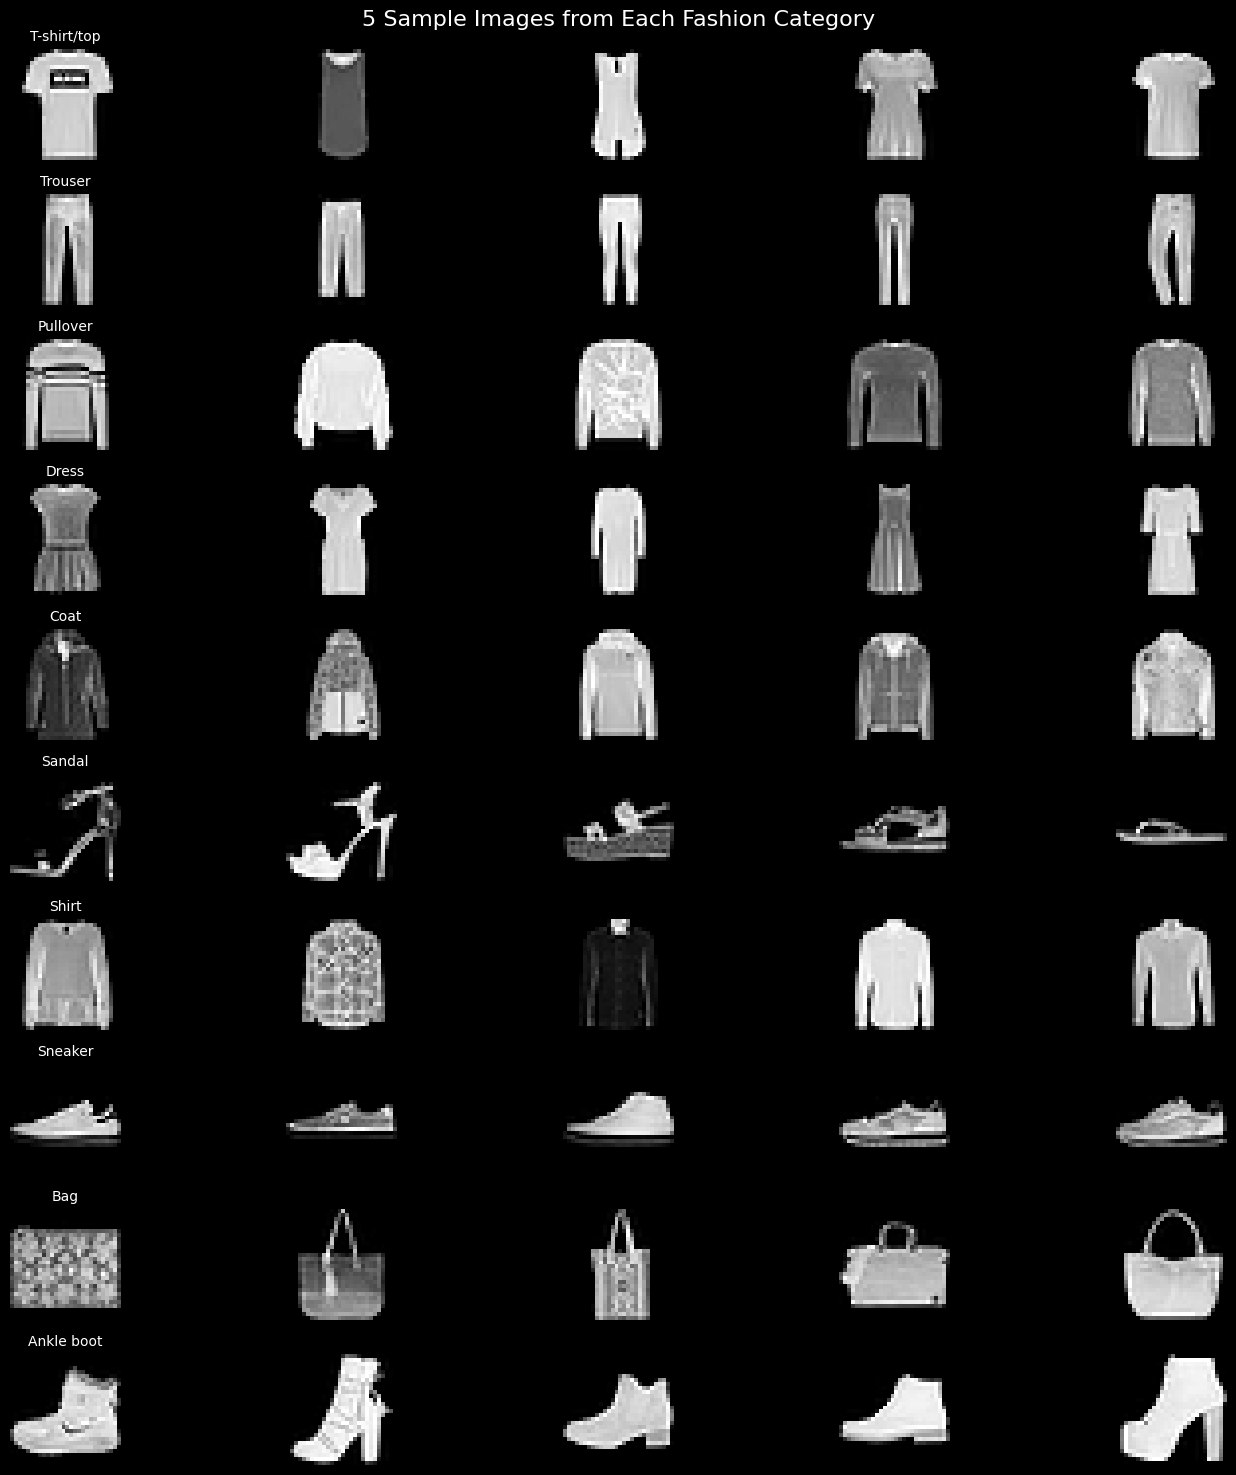

In [91]:
# Plot 5 images per category
plt.figure(figsize=(15, 15))
samples_per_class = 5

for label in unique_classes:
    idxs = np.where(y_train == label)[0][:samples_per_class]
    for i, idx in enumerate(idxs):
        plt_idx = label * samples_per_class + i + 1
        plt.subplot(10, samples_per_class, plt_idx)
        plt.imshow(x_train[idx], cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(class_labels[label], fontsize=10)
plt.suptitle("5 Sample Images from Each Fashion Category", fontsize=16)
plt.tight_layout()
plt.show()


In [92]:
# 3. Flatten each 28x28 image into a 784-dimensional vector
x_test = x_test_org.reshape(10000, 784)# Each image is converted into 784 pixel flatten array

print("Flattened Test Data Shape:", x_test.shape)

Flattened Test Data Shape: (10000, 784)


In [93]:
# 4. Compute cosine similarity matrix (10000 x 10000)
cos_similarity = cosine_similarity(x_test)

# Optional: Convert to DataFrame
cosine_df = pd.DataFrame(cos_similarity)

In [94]:
# 5. Select reference image index
ref_idx = 100  # you can change this to any index 0-9999

# Get cosine similarity vector for this image
image_info = cosine_df.iloc[ref_idx].values

# Get top 10 similar images (excluding itself)
similar_images_idx = np.argsort(-image_info)[1:11]  # skip the image itself

print("Most similar image indices:", similar_images_idx)


Most similar image indices: [2172 4372 5702 7563 2793 3686 7501 1393 3364 4722]


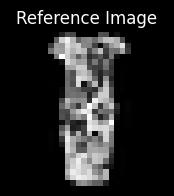

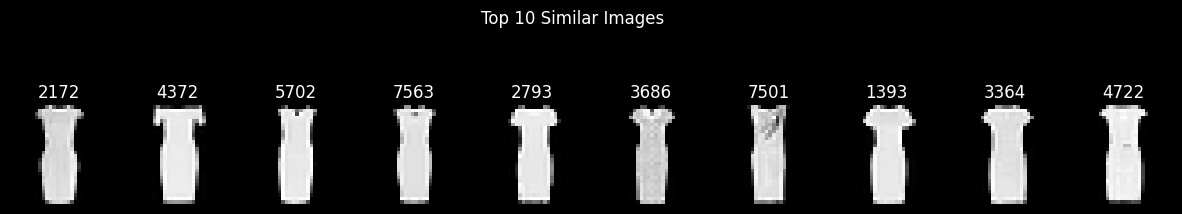

In [95]:
# 6. Display the reference image
plt.figure(figsize=(2, 2))
plt.title("Reference Image")
plt.imshow(x_test_org[ref_idx], cmap='gray')
plt.axis('off')
plt.show()

# 7. Display top 10 similar images
plt.figure(figsize=(15, 3))
for i, idx in enumerate(similar_images_idx):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test_org[idx], cmap='gray')
    plt.title(f"{idx}")
    plt.axis('off')
plt.suptitle("Top 10 Similar Images")
plt.show()